Just measure the standard Julia `sort` for increasing input sizes

In [1]:
using BenchmarkTools
using Plots

In [2]:
times = []
for n in 1:20
    data = rand(UInt32, 2^n)
    qq = @benchmark sort($data)
    push!(times, qq)
end

In [15]:
tt = [x.times[div(end,2)] for x in times]
xx = 2 .^ (1:20);

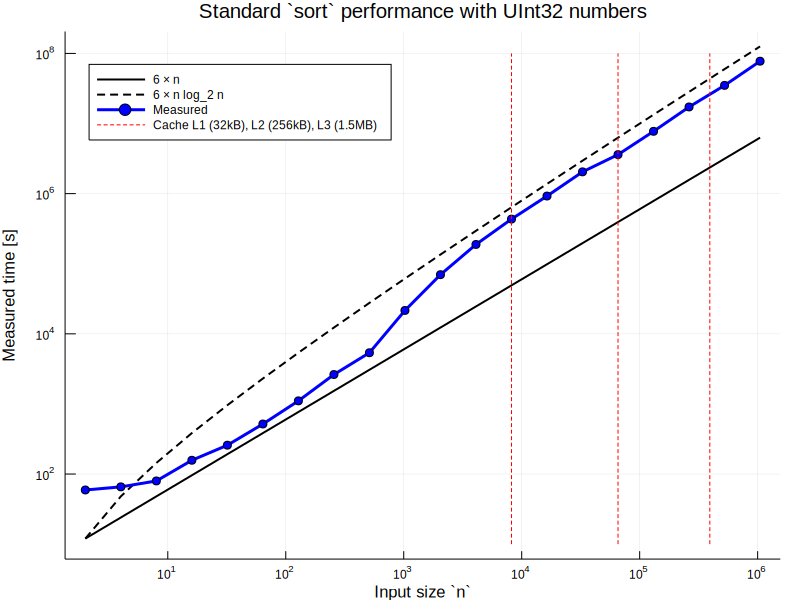

In [65]:
plot(title="Standard `sort` performance with UInt32 numbers", legend=:topleft, xaxis="Input size `n`", yaxis="Measured time [s]", size=(800,600))
plot!(xx, 6 * xx, xaxis=:log, yaxis=:log, l=2, color=:black, label="6 × n")
plot!(xx, 6 * xx .* log2.(xx), xaxis=:log, yaxis=:log, l=2, ls=:dash, color=:black, label="6 × n log_2 n")
plot!(xx,tt, m=:circ, xaxis=:log, yaxis=:log, l=3, color=:blue, label="Measured")
plot!([2^13, 2^13],[1e1,1e8], ls=:dash, xaxis=:log, yaxis=:log, l=1, color=:red, label="Cache L1 (32kB), L2 (256kB), L3 (1.5MB)")
plot!([2^16, 2^16],[1e1,1e8], ls=:dash, xaxis=:log, yaxis=:log, l=1, color=:red,label="")
plot!([6*2^16, 6*2^16],[1e1,1e8], ls=:dash, xaxis=:log, yaxis=:log, l=1, color=:red,label="")